# **KMEANS CLUSTERING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,silhouette_score
from sklearn.impute import SimpleImputer

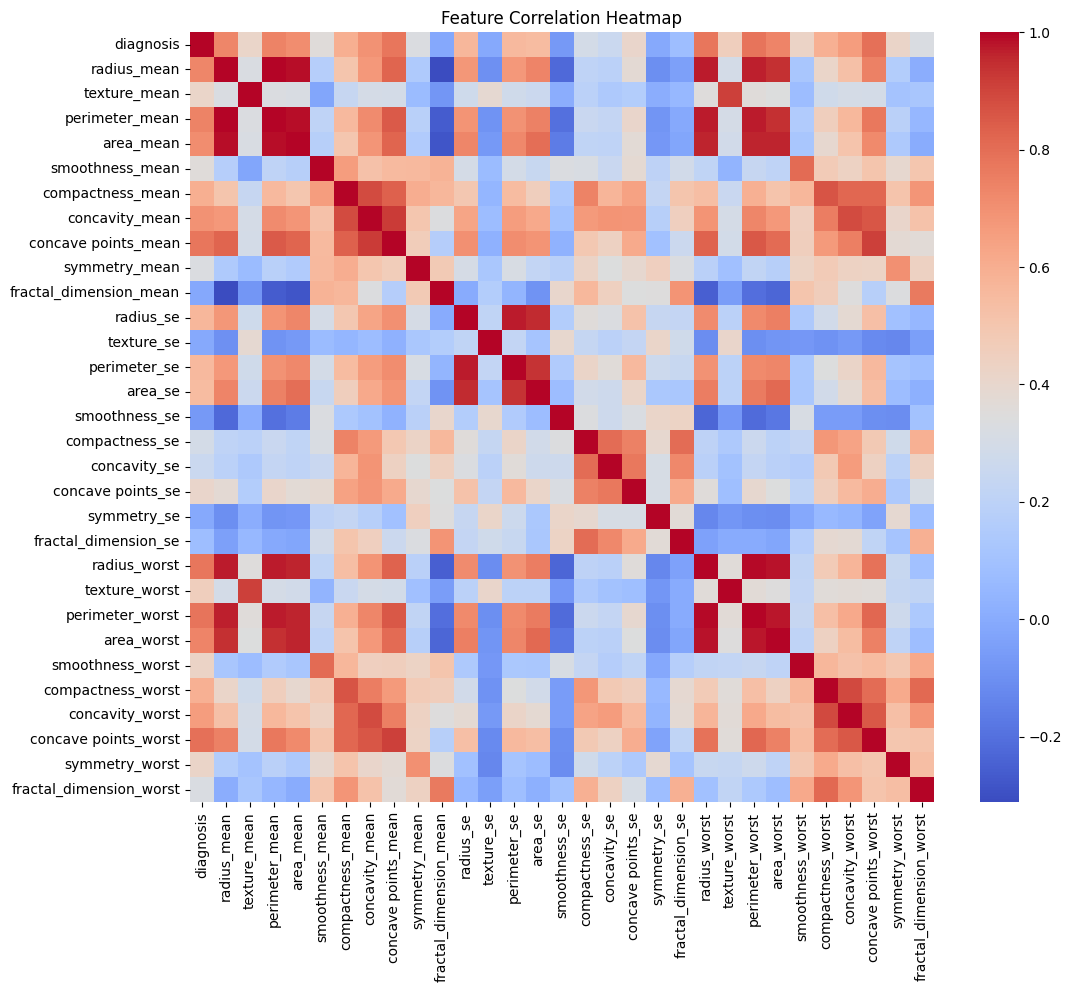

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')


df = df.drop(columns=['id'])

label = LabelEncoder()
for column in ['diagnosis']:
  df[column] = label.fit_transform(df[column])


X = df.drop(columns=['diagnosis'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


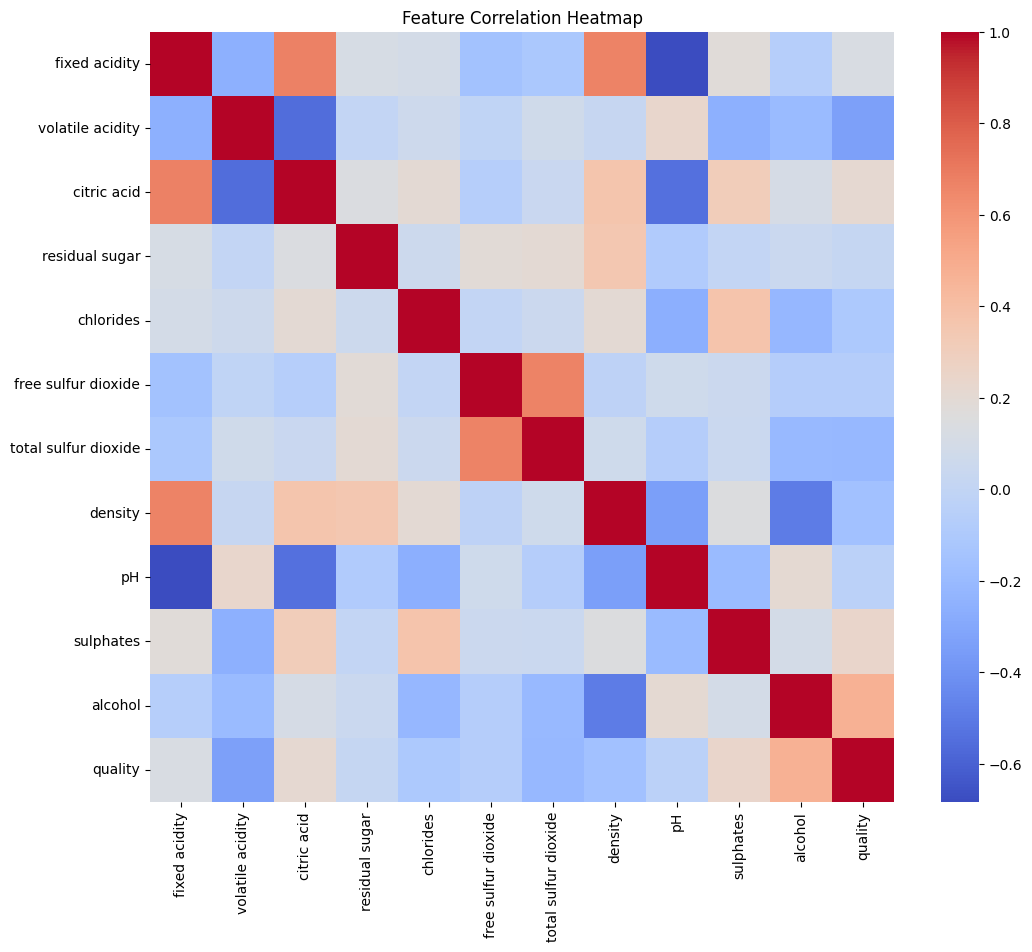

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')

def map_quality(value):
    if value == 4:
        return 0  # Low quality
    elif  value == 5:
        return 1  # Medium quality
    elif value == 6:
        return 2  # Good quality
    else:
        return 3  # Excellent quality

df['quality'] = df['quality'].apply(map_quality)

X = df.iloc[: ,:-1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

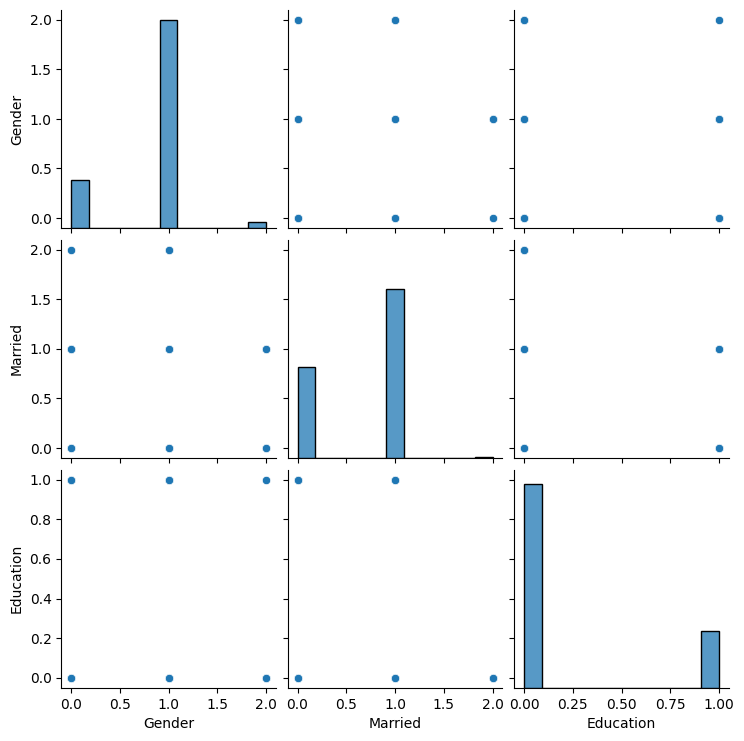

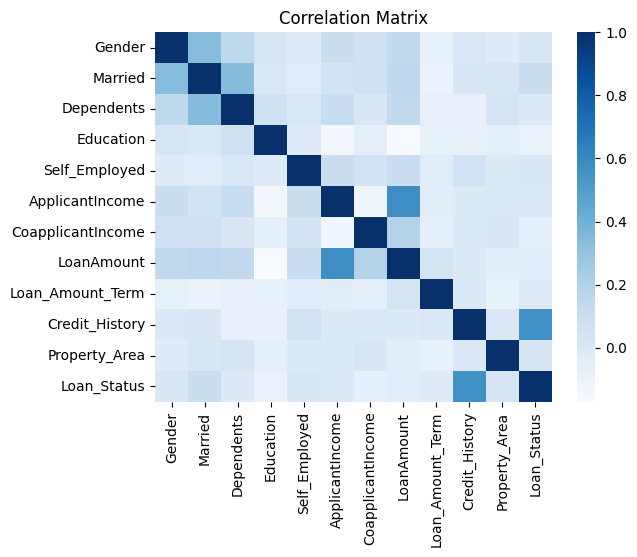

In [ ]:
df = pd.read_csv('/content/loan_sanction_train.csv')

df.drop(columns = 'Loan_ID' , inplace = True)

label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
  df[column] = label_encoder.fit_transform(df[column])

X = df.iloc[: , :-1].values


imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

sns.pairplot(df[['Gender','Married','Education']])
plt.show()

cor = df.corr()
sns.heatmap(cor,annot = False, cmap ='Blues')
plt.title('Correlation Matrix')
plt.show()


KMeans Silhouette Score: 0.345


<ipython-input-13-0bc0b7b507b5>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', cmap='viridis', marker='x',s=200)


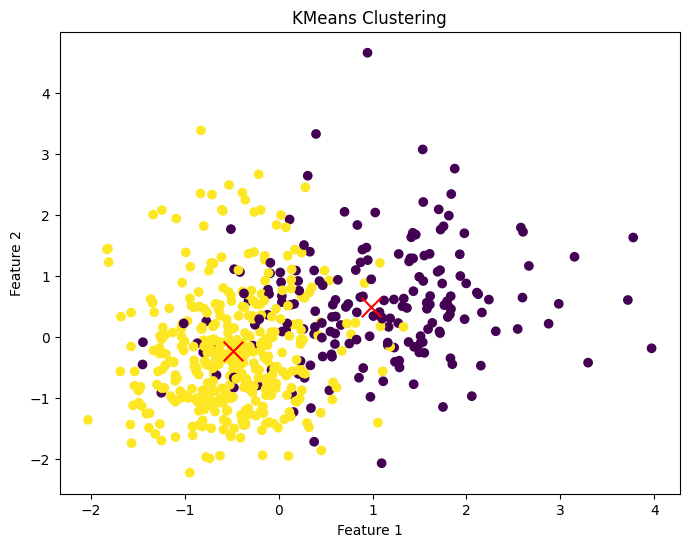

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate KMeans performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")

# Plot KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', cmap='viridis', marker='x',s=200)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# **KMEDIOD CLUSTERING**

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.2 MB/s eta 0:00:00


K-Medoids Silhouette Score: 0.337


<ipython-input-14-f5c114836b8d>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', cmap='viridis', marker='x', s=200)


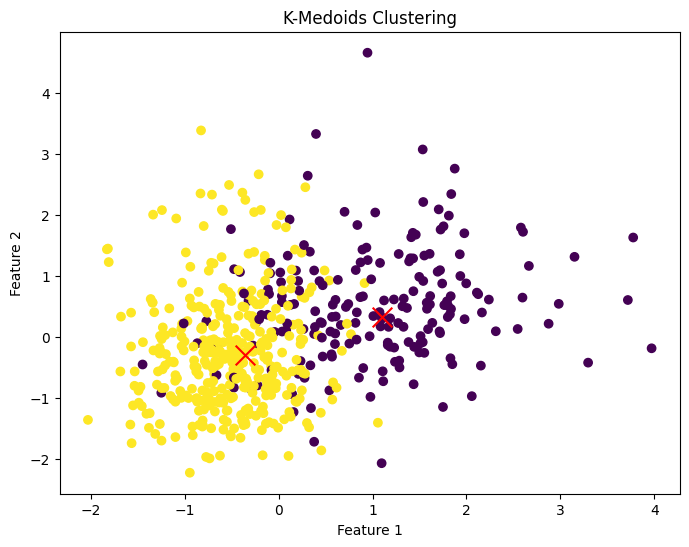

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluate K-Medoids performance using silhouette score
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.3f}")

# Plot K-Medoids clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis', marker='o')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], c='red', cmap='viridis', marker='x', s=200)
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
